CMP5006 Computer Security

Homework 1 – Information Security
Members: Melanie Álvarez (00326266), Marie Cucalón (00321395), Ma. Emilia Rivadeneira (00325821)
NRC: 1230


# Part 1. PicoCTF

# INTERENCDEC

**Solution 1:** To decode the message provided, we first analyzed the message and concluded it was encoded in base64, because:
* The message contains characters (A–Z, a–z), the numerals (0–9), and the "=" symbol as a special suffix code.
* The bit length is multiple of 8 (70 characters * 8 = 560)

Then, we built a code that decoded the message using the base64 table. 

In [1]:
# Base64 table
base64_chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/"

encoded_text = "YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclgya3lNRFJvYTJvMmZRPT0nCg" 
# SWe discard the last two == because they are not part of the base64 encoding

# Get the indexes of each character in the base64 table
indices = [base64_chars.index(c) for c in encoded_text]

# Convert to binary string
binary_string = "".join(f"{i:06b}" for i in indices)

# Split the binary string into bytes
bytes_list = [binary_string[i:i+8] for i in range(0, len(binary_string), 8)]

# Convert the bytes to characters
decoded_text = "".join(chr(int(byte, 2)) for byte in bytes_list)
print(decoded_text)

b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2kyMDRoa2o2fQ=='
 


This is the message the code printed:

In [3]:
# b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzg5MGsyMzc5fQ=='

The two = = gave us the idea that the message had been encoded two times, so we ran again the code with the new message. We ignored the ‘’ characters because they are not part of the base64 table.

In [4]:
# Base64 table
base64_chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/"

encoded_text = "d3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzg5MGsyMzc5fQ" 
# SWe discard the last two == because they are not part of the base64 encoding

# Get the indexes of each character in the base64 table
indices = [base64_chars.index(c) for c in encoded_text]

# Convert to binary string
binary_string = "".join(f"{i:06b}" for i in indices)

# Split the binary string into bytes
bytes_list = [binary_string[i:i+8] for i in range(0, len(binary_string), 8)]

# Convert the bytes to characters
decoded_text = "".join(chr(int(byte, 2)) for byte in bytes_list)
print(decoded_text)

wpjvJAM{jhlzhy_k3jy9wa3k_890k2379} 


The code printed the following message

In [5]:
# wpjvJAM{jhlzhy_k3jy9wa3k_890k2379}

It had the format of a pico flag (picoCTF{something}). By analyzing this output, we knew we weren’t facing a base64 encoding, this message only had characters [A-Z][a-z], the numbers and special characters like ‘_’ were part of the original message.

So, we visited an online Caesar Cipher Decoder. We used the brute force option that tests all possible shifts in the decryption. Here is what we got:

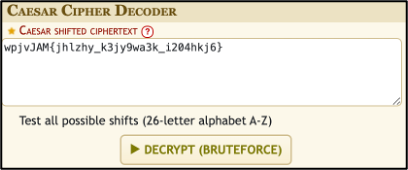

In [6]:
from IPython.display import Image

Image("imgs/interencdec1.png")

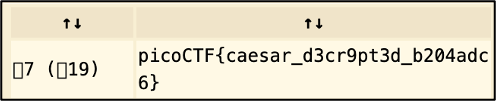

In [7]:
Image("imgs/interencdec2.png")

**Solution 2:** As an alternative solution, we used CyberChef, a tool that facilitates the manipulation and decoding of data of different types, such as base conversions, encryption, decoding and data analysis. For the recipe, we incorporated a ‘From Base64’ block to decode Base64 encoded data.

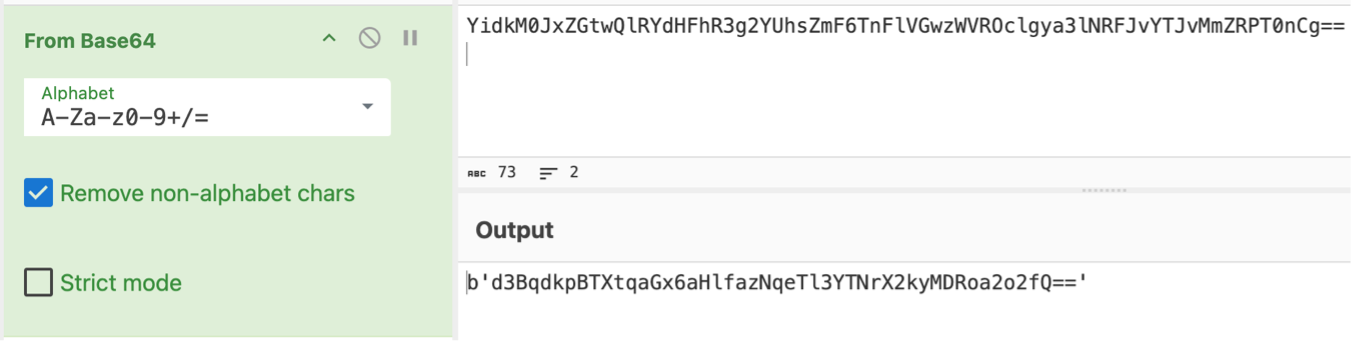

In [8]:
Image("imgs/interencdec3.png")

The output obtained was entered as input.

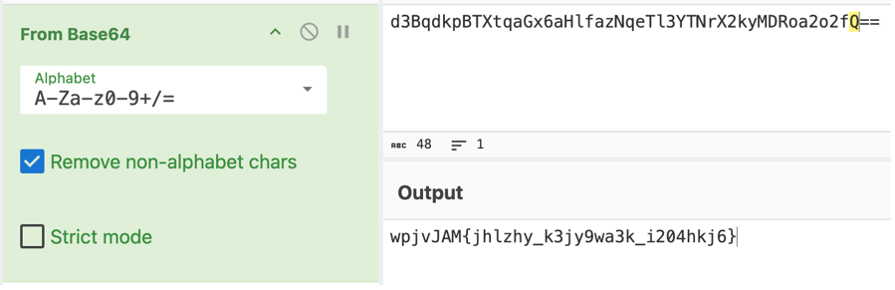

In [9]:
Image("imgs/interencdec4.png")

Then, we incorporated a second block ‘Caesar Box Cipher’, but it didn’t work. So, we tried with a variation of the Caesar Cipher, the ‘ROT13’ block.

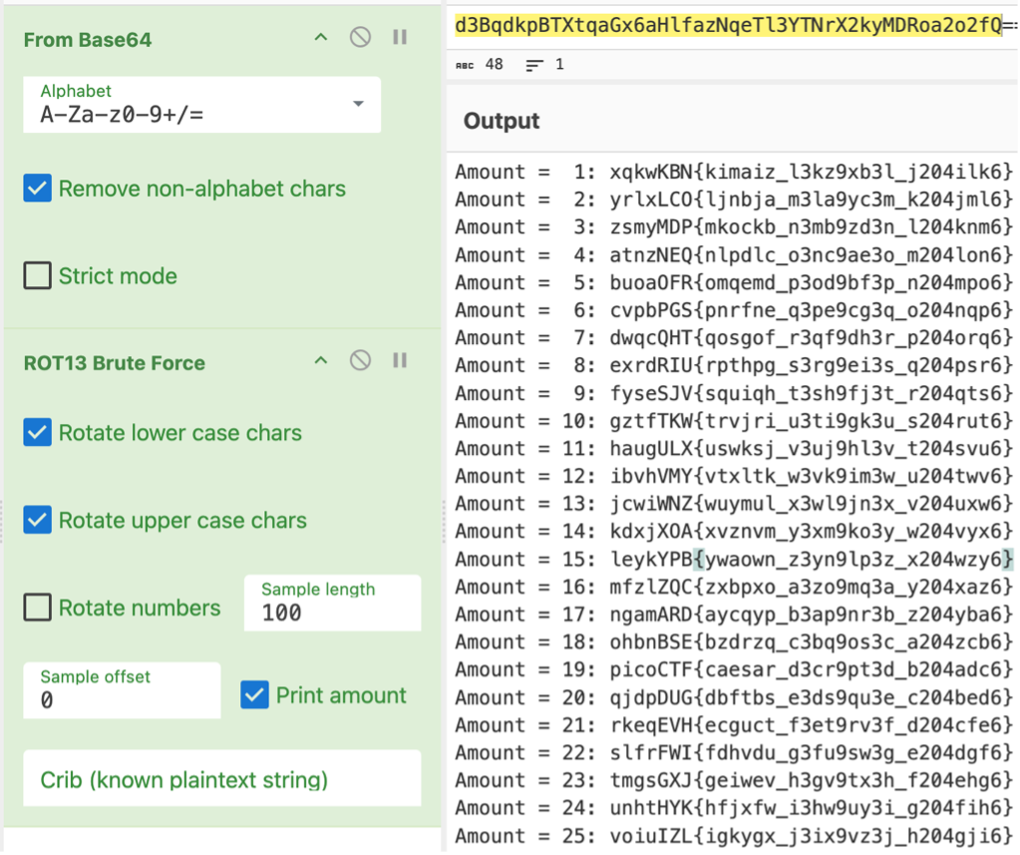

In [10]:
Image("imgs/interencdec5.png")

And that’s how we got to the flag: **picoCTF{caesar_d3cr9pt3d_b204adc6}**

# THE NUMBERS

**Solution 1:** The solution to this problem was straightforward. The image presented a series of numbers, with the characters ‘{‘, ‘}’, so it was clear that we were dealing with the flag. We matched each number with its position in the alphabet and replaced the number for the corresponding letter.

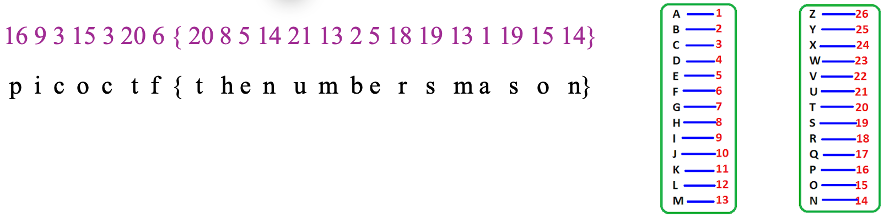

In [11]:
Image("imgs/numbers1.png")

We got the following flag: **picoctf{thenumbersmason}**

**Solution 2:** Now, we automated the matching process with a python script.

In [12]:
import string

msg = ''

for i in [16, 9, 3, 15, 3, 20, 6, 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14]:
    msg += string.ascii_lowercase[i-1]

print(msg)

picoctfthenumbersmason


And got the same flag: **picoctf{thenumbersmason}**

# C3

**Solution 1:** We were given the encoder and the ciphertext. The encoder performed a difference-based encoding. Each character in the ciphertext is assigned an index, the expression (cur - prev) % 40 calculates how far the current character is from the previous character, mod 40.

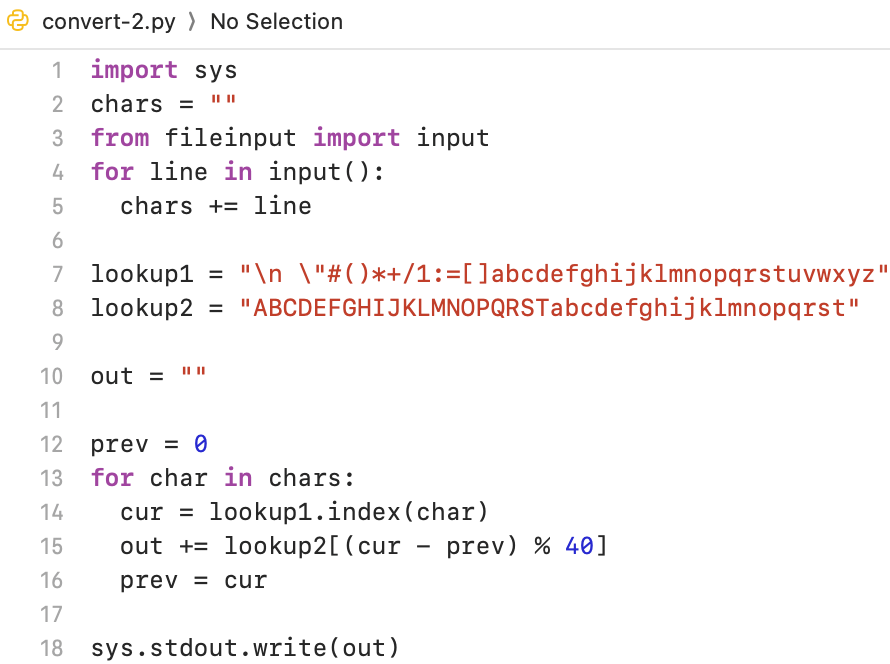

In [13]:
Image("imgs/c31.png")

To decipher the ciphertext, we inverted the lookup tables and we added 40 to each index instead of subtracting.

In [14]:
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

ciphertext = "DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl"

out = ""

prev = 0
for char in ciphertext:
  cur = lookup2.index(char)
  this = lookup1[(cur + prev) % 40]
  out += this
  prev = lookup1.index(this)

out

'#asciiorder\n#fortychars\n#selfinput\n#pythontwo\n\nchars = ""\nfrom fileinput import input\nfor line in input():\n    chars += line\nb = 1 / 1\n\nfor i in range(len(chars)):\n    if i == b * b * b:\n        print chars[i] #prints\n        b += 1 / 1\n'

We got a python2 program, which we executed in an online python2 compiler.

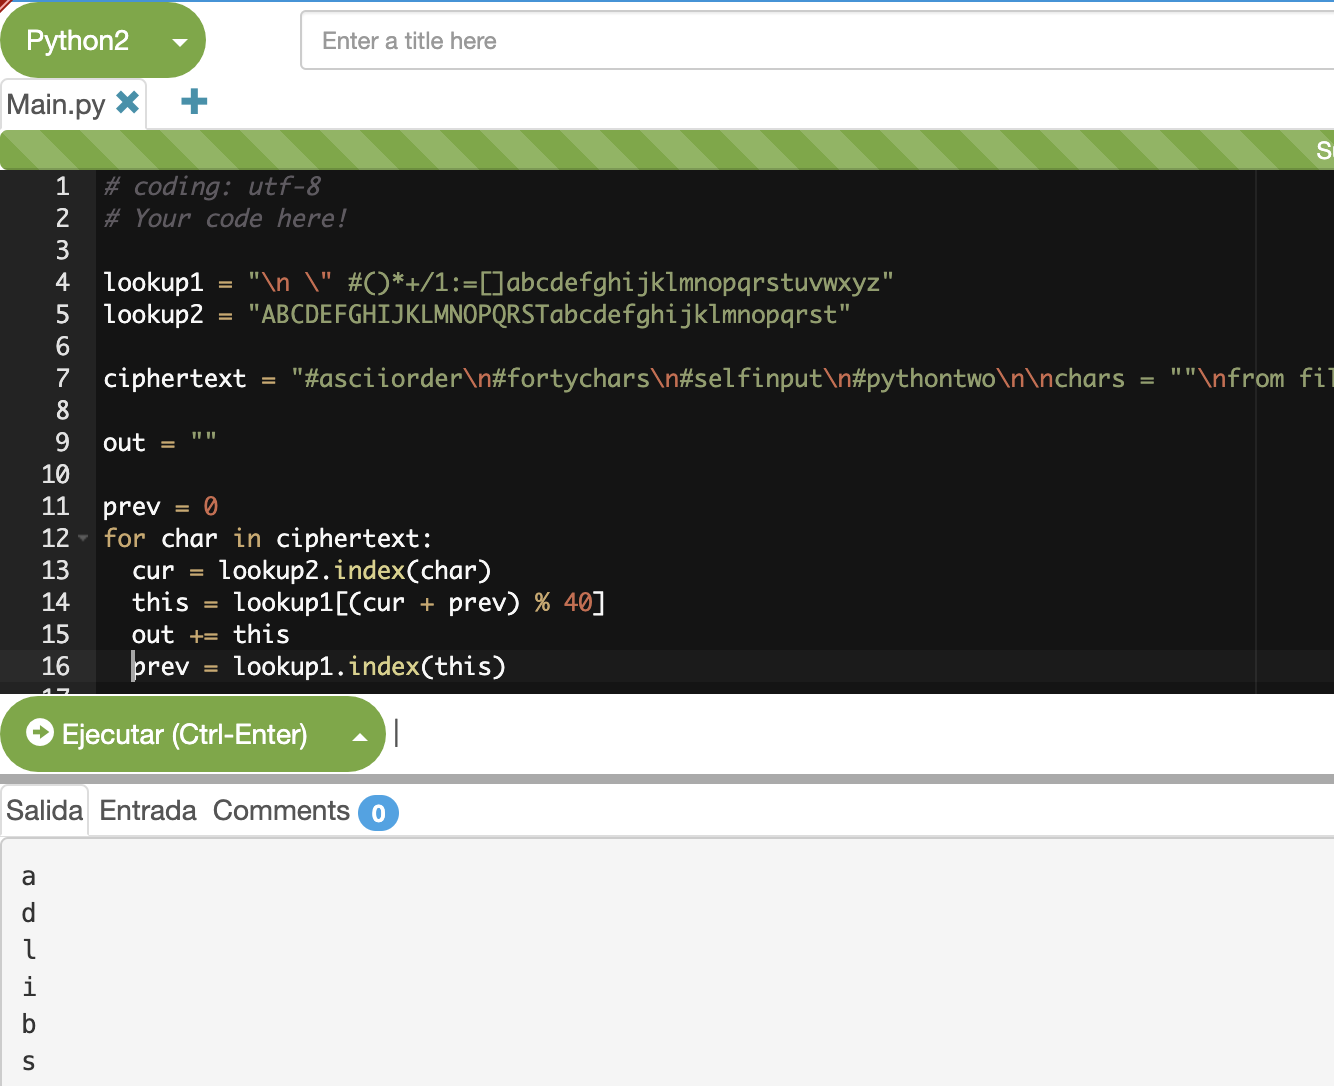

In [15]:
Image("imgs/c33.png")

And we got the flag: **picoCTF{adlibs}**

**Solution 2:** We tested the convert.py with the original message to check if it generated the same output. We didn't find an alternative to the solution, it is very standard, so we did this to understand more about the cipher.

In [ ]:
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

ciphertext = "#asciiorder\n#fortychars\n#selfinput\n#pythontwo\n\nchars = \nfrom fileinput import input\nfor line in input():\n    chars += line\nb = 1 / 1\n\nfor i in range(len(chars)):\n    if i == b * b * b:\n        print chars[i] #prints\n        b += 1 / 1\n"

out = ""

prev = 0
for char in ciphertext:
  cur = lookup1.index(char)
  this = lookup2[(cur + prev) % 40]
  out += this
  prev = lookup2.index(this)

out

# Hide To See

**Solution 1:** At first sight, the image provided by PicoCTF didn’t provide much information, it was just two circles with the letters of the alphabet. We had to investigate further, and the fact that we got an image as clue led us to believe that we were dealing with a case of steganography.

After some research, we found an online steganographic decoder that could decode the payload hidden in this JPEG image. Once we uploaded it, we got this text:


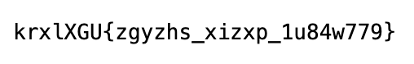

In [16]:
Image("imgs/hide1.png")

The format of the message was similar to the flag, we were close to solving the challenge. The image presented the atbash cipher, so we tried to decipher the text with this method. This is what we got:

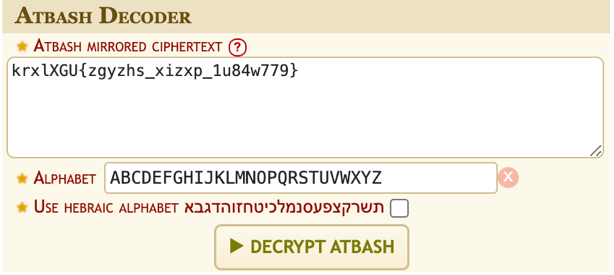

In [17]:
Image("imgs/hide2.png")

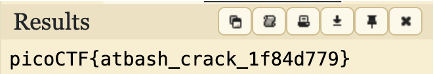

In [18]:
Image("imgs/hide3.png")

**Solution 2:** Alternatively, we used the ubuntu server virtual machine to access Stegseek's tool, a steghide cracker that can be used to extract hidden data from files.

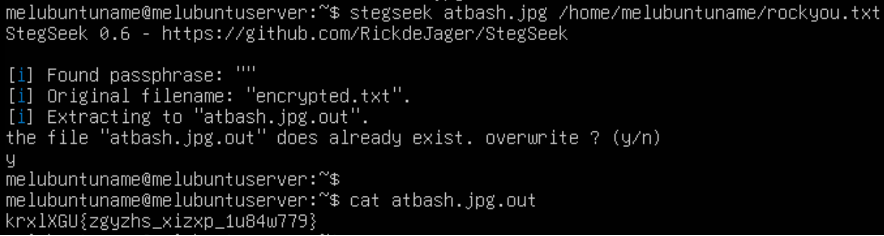

In [19]:
Image("imgs/rsa4.png")

Then, we visited CyberChef, imported an atbash cipher block and inserted the obtained message.

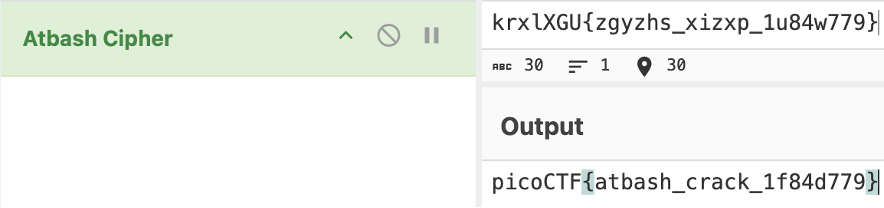

In [20]:
Image("imgs/hide5.png")

# RSA_ORACLE

**Solution 1:** First, we tried the oracle with a random message to look at the encryption process.

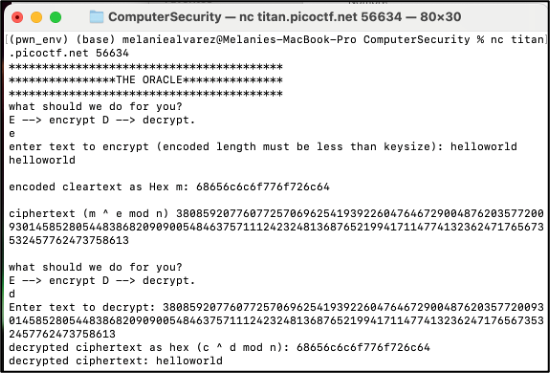

In [21]:
Image("imgs/rsa1.png")

Now that we knew how it works, we investigated how the reverse process would be to decode the message. We found the following mathematical equivalence:

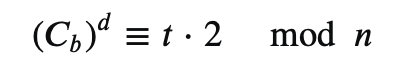

In [22]:
Image("imgs/rsa2.png")

If an attacker has an encrypted message, he can create a new ciphertext by multiplying the original by 2. When the server decrypts this new ciphertext, the attacker gets the original message multiplied by 2, which makes it easier to recover the plaintext by dividing by 2.

The code for this attack is as follows:

In [25]:
from pwn import *

context.log_level='critical'
p = remote("titan.picoctf.net", 56634)

p.recvuntil(b"decrypt.")

with open("password-3.enc") as file:
    c = int(file.read())

p.sendline(b"E")
p.recvuntil(b"keysize): ")
p.sendline(b"\x02")
p.recvuntil(b"mod n) ")

c_a = int(p.recvline())

p.sendline(b"D")
p.recvuntil(b"decrypt: ")
p.sendline(str(c_a*c).encode())
p.recvuntil(b"mod n): ")

password = int(p.recvline(), 16) // 2
password = password.to_bytes(len(str(password))-7, "big").decode("utf-8")

print("Password:", password)

ModuleNotFoundError: No module named 'pwn'

We ran this code by console, obtained a key and inserted it in the command that provided the picoCTF hint:

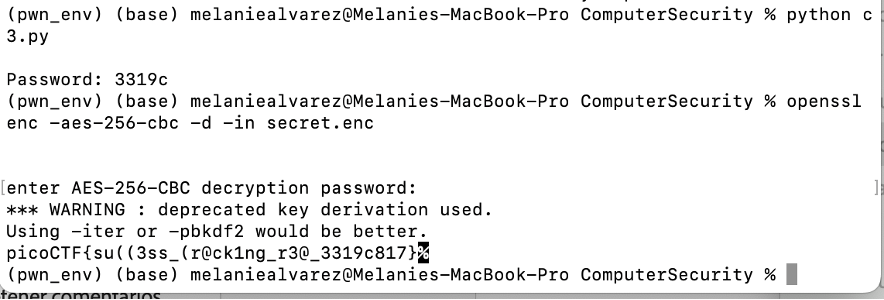

In [ ]:
Image("imgs/rsa3.png")

And we obtained the flag: **picoCTF{su((3ss_(r@ck1ng_r3@_3319c817)))}**

**Solution 2:** As an alternative, we worked directly with the encoded password and a plaintext attack by leveraging its partially-homomorphic nature.

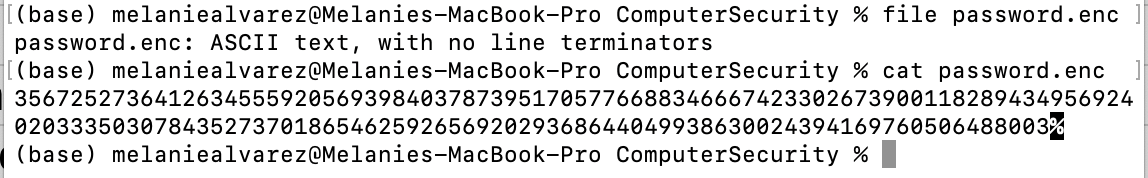

In [51]:
Image("imgs/password.png")

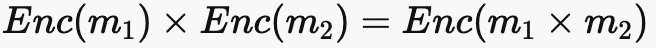

In [52]:
Image("imgs/homomorphic.png")

This is the script we used:

In [ ]:
from subprocess import run, PIPE  
  
# Grab ciphertext
with open("password.enc", "r") as f:  
	c = int(f.read())  
  
print("Phase 1: Get password\n")  
  
print(f"c = {c}\n")  
 
# Get message from user
m1 = input("Enter message (m1): ")  
m1_bytes = bytes(m1, "utf-8")  
m1_int = ord(m1_bytes) 
  
print(f"Have the oracle encrypt this message (m1): {m1}\n")  
c1 = int(input("Enter ciphertext from oracle (c1 = E(m1)): "))  
print("\n")  
 
# Exploit the homomorphic property of RSA
c2 = c * c1  
print(f"Have the oracle decrypt this message (c2 = c * c1): {c2}\n")  
  
m2 = int(input("Enter decrypted ciphertext as HEX (m2 = D(c2): "), 16)  
print("\n")  
 
# Exploit the homomorphic property of RSA some more
m_int = m2 // m1_int  
m = m_int.to_bytes(len(str(m_int)), "big").decode("utf-8").lstrip("\x00")
print(f"Password (m = m2 / m1): {m}\n")  
  
print("-" * 50)  
  
print("Phase 2: Decrypt secret.enc\n")  
 
# Decrypt the secret and print it
res = run(["openssl", "enc", "-aes-256-cbc", "-d", "-in", "secret.enc", "-pass",  
f"pass:{m}"], stdout=PIPE, stderr=PIPE, text=True)  
print(res.stdout)

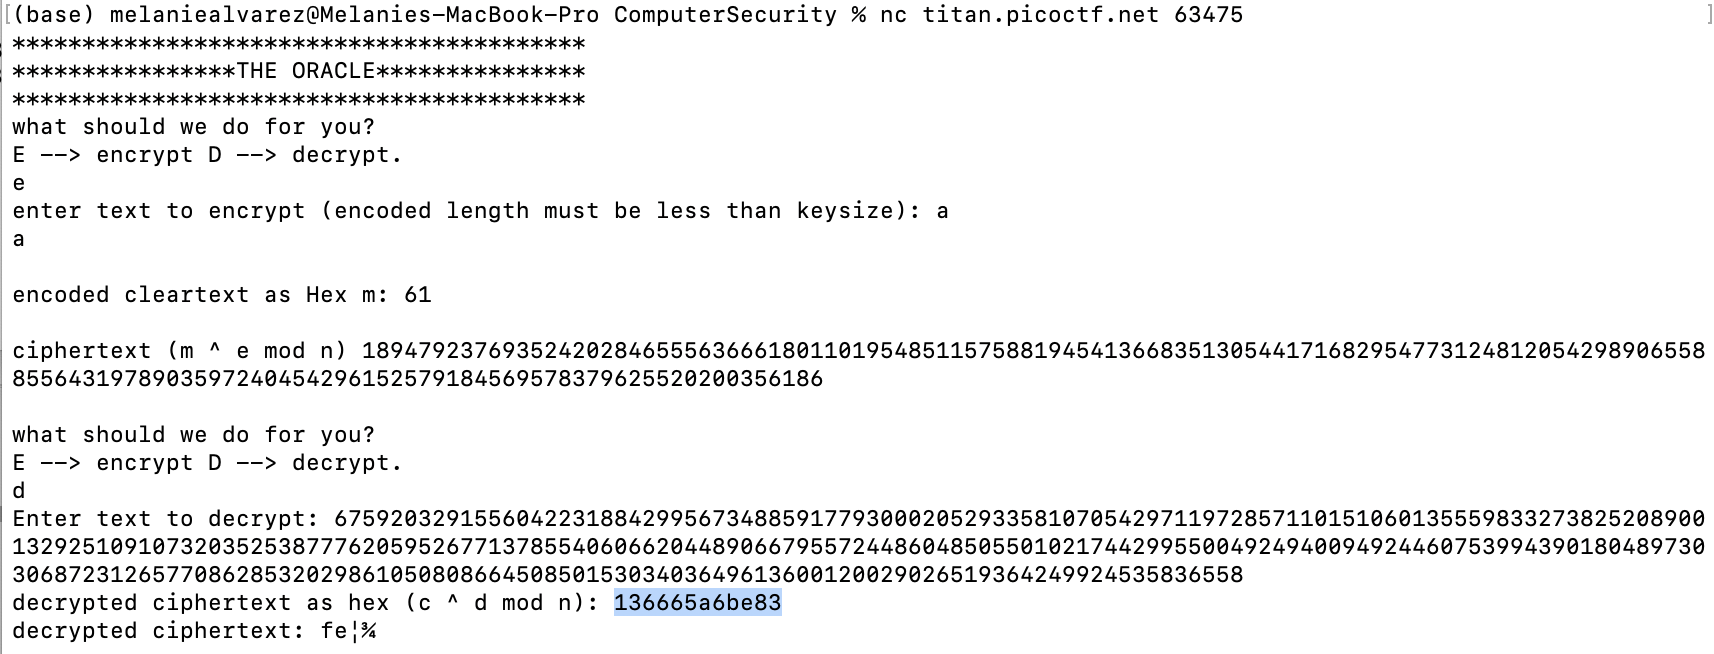

In [53]:
Image("imgs/rsa5.png")

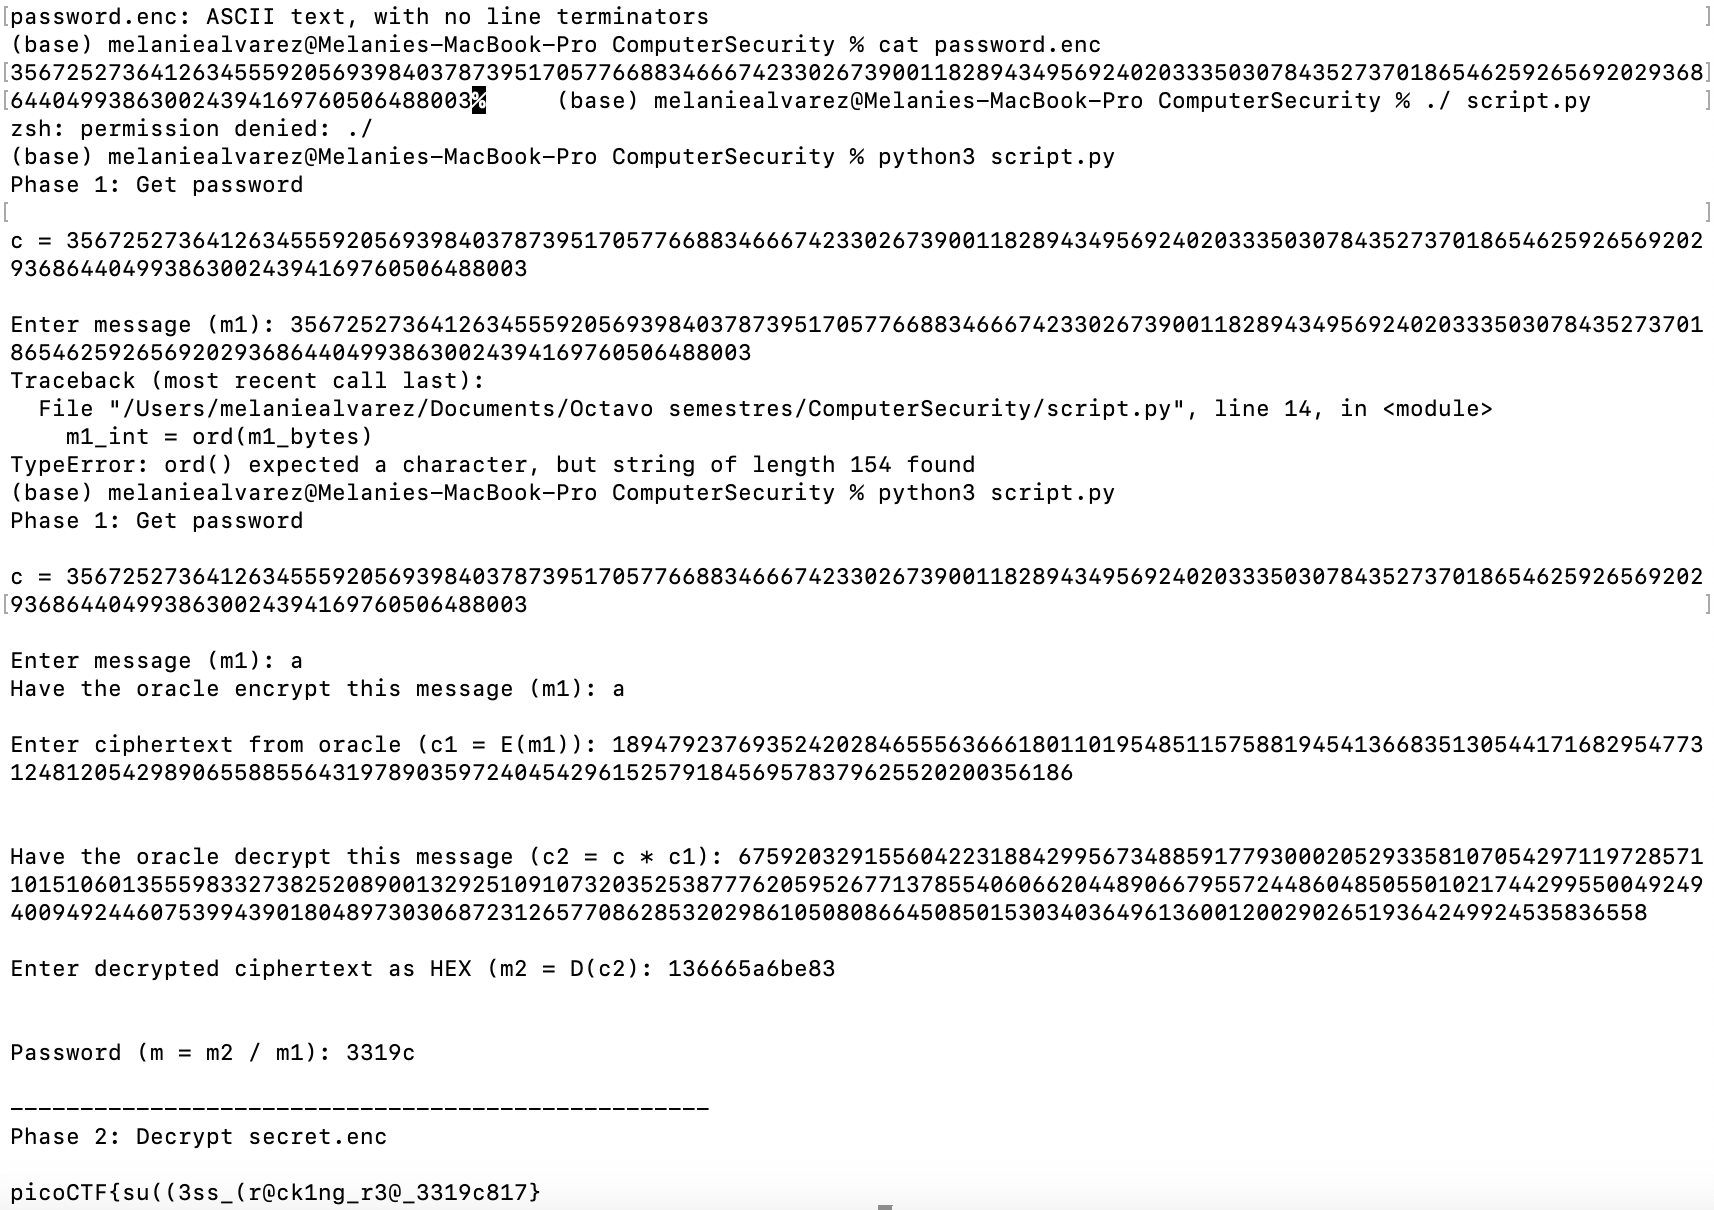

In [54]:
Image("imgs/rsa6.png")